Добрый день!
 
### Задание
В качетсве проекта было предложено рассмотреть данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Задача данного проекта — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

## Шаг 1. Общая информация о датасете

In [142]:
#Устанавливаем библиотеки для работы

import pandas as pd
import matplotlib.pyplot as plt 
import warnings

warnings.filterwarnings("ignore")

In [143]:
#подгружаем данные в систему

data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [144]:
#изучим данные с помощью метода info

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Данные переданы в формате CSV. Разделитель, который был использован в файле - "\t"

Датасет содержит 23 699 строк и 22 колонки. 

Данные содержат пропущенные значения. Более подробнее о них рассмотрим ниже. 

Данные представлены различными типами: присутствуют столбцы с целыми, вещественными числами, строками, булевыми значениями. 

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

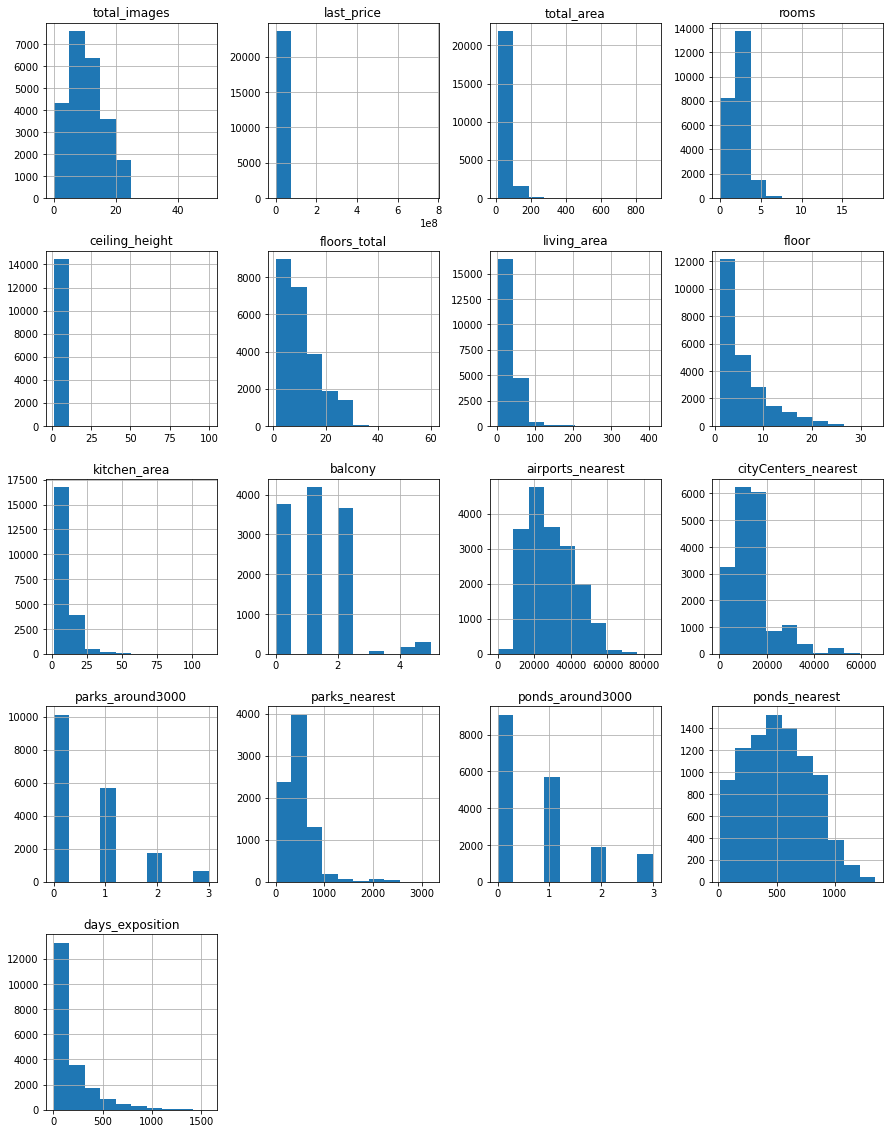

In [145]:
#построим гистограмму для всех столбцов датафрейма

data.hist(figsize=(15, 20))

In [146]:
#количество явных дубликатов - 0
data.duplicated().sum()

0

На первый взгляд о данных по диаграммам сложно сделать какие-то выводы: различаются данные по типу значений (числа, строки). 

На графиках видно столбцы, распределение данных по которым близко к Пуасонновскому: число фотографий (total_images), число комнат (rooms), количество этажей в доме, жилая площадь, растояние до центра города, расстояние до ближайшего парка, расстояние до ближайшего водоёма, сколько дней было размещено объявление (от публикации до снятия). 

Наблюдаются пики по диаграммам:
* наибольшее количество обявлений содержит примерно 10 фотографий
* цена на момент снятия с публикации наибольшего количества обявлений составляла не более 100 000 000 
* общая площадь квартиры в квадратных метрах в основном не превышает 100 кв.м.
* в основном в квартире не более 3 комнат
* большинство квартир имеет высоту потолков менее 10 метров
* всего этажей в доме в основном менее 20
* жилая площадь в основном менее 50 кв. м.
* наибольшее количество квартир находится на этажах менее 10 
* площадь кухни в основном - менее 15 кв.м.
* в основном количество балконов - менее 2
* удаленность от аэропорта в основном примерно 20000 метров
* удаленность от центра города в основном - менее 20000 метров
* парки в радиусе 3 км в основном отсутствуют
* расстояние до ближайшего парка в основном примерно 500м (данное наблюдение вызывает вопросы)
* водоемы в радиусе 3 км в основном отсутствуют
* расстояние до ближайшего водоема в основном примерно 500м (данное наблюдение вызывает вопросы)
* в основном количество после размещения объявления - менее 250

## Шаг 2. Предобработка данных
Далее будет проведена предобработка данных:
* будут рассмотрены и преобразованы типы данных, используемых в датасете
* будут удалены явные и неяные дубликаты
* будут устранены отстуствующие значения

In [147]:
#определяем пропуски в данных

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В данных пропущены значения в следуюших столбцах:
* высота потолков (скорее всего человеческий фактов - люди редко при выставлении объявления на продажу указывают высоту потолков. Данные по высоте потолков в основном стабильны и не должны превышать 5м., то есть нахождение средней по всем квартирам даст примерное число для заполнения пропусков (так как нет сильных выбросов). Для дальнейшей работы можно высоту потолков заполнить средним или медианным значением. 

* количество этажей в доме (скорее всего человеческий фактор - человек может не знать общую высоту дома, если дом многоэтажный). Данные могут содержать выбросы (если дом - высотное здание), поэтому для данного случая пропуски можно заполнить медианным значением

* жилая площать (скорее всего человеческий фактор - человек может не знать конкретно жилую площадь квартиры). Для дальнейшей работы можно жилую площадь заполнить медианным значением. 

* апартаменты - скорее всего пропущенные значения - это не апартаменты, поэтому пропуски можно заполнить False

* площадь кухни в квадратных метрах - комментарий аналогичен жилой площади

* количество балконов - скорее всего пропущенные значения - это отсутствие балконов, поэтому пропуски можно заполнить 0

* отсутствие заполненного названия населенного пункта - возможно также человеческий фактор (данные оказались незаполнены при формировании объявления или населенный пункт остутствует). Пропуски заполнить невозможно

* расстояние до центра и до аэропорта - возможно причина также в человеческом факторе (заполняющий не знает, каково расстояние до центра города (скорее всего до центра Санкт-Петербурга) или данный фактор не оказывает влияние на формирование цены квартиры, поэтому попросту был пропущен (например, для домика в деревне или прочего удаленного объекта)). Если расстояние указывается автоматически с использованием Карт, то возможно человек указал в адресе несуществующий адрес, поэтому система не смогла найти объект на карте. Возможно также отсутсвие центра города/аэропорта - то есть населенный пункт - деревня или село.   

* количество парков и прудов на расстоянии не более 3 км, удаленность от объекта до парка/пруда. - скорее всего парков или прудов в населенном пункте нет. Если расстояние указывается автоматически с использованием Карт, то возможно человек указал в адресе несуществующий адрес, поэтому система не смогла найти объект на карте.  

* days_exposition - пропуск этих данных не связан с заполнением данных вручную, в отличие от факторов выше, поэтому с этой проблемой можно обратиться к разработчикам, предоставившим данные. Для целей задачи заполним данные медианным значением




In [148]:
data['first_day_exposition']

0        2019-03-07T00:00:00
1        2018-12-04T00:00:00
2        2015-08-20T00:00:00
3        2015-07-24T00:00:00
4        2018-06-19T00:00:00
                ...         
23694    2017-03-21T00:00:00
23695    2018-01-15T00:00:00
23696    2018-02-11T00:00:00
23697    2017-03-28T00:00:00
23698    2017-07-21T00:00:00
Name: first_day_exposition, Length: 23699, dtype: object

In [149]:
#меняем тип данных для корректного устранения дубликатов

data['ceiling_height'] = data['ceiling_height'].astype('float')
data['living_area'] = data['living_area'].astype('float')

In [150]:
#преобразуем тип данных дата, округляем до дня
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')
data['first_day_exposition']=data['first_day_exposition'].dt.round('1D') 

In [151]:
data['floors_total'] = data['floors_total'].fillna(data['floor'])

In [152]:
data['year'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [153]:
data[data['days_exposition'].isna()].value_counts('year')

year
2019    1796
2018     959
2017     271
2015      70
2016      67
2014      18
dtype: int64

Основная часть пропусков - данные 2019 года.  Возможно наличие пропусов означает то, что квартиры еще не проданы и висят в объявлении. Тогда пропуски заполнять не будем. 

In [154]:
data = data.drop(columns = 'year')

In [155]:
#заполняем пропуски

col_name = ['ceiling_height', 'living_area', 'kitchen_area', ]

for item in col_name:
    data[item] = data[item].fillna(data[item].median())

#добавляем в пропуски данные об объектах, которые не являются апартаментами
data['is_apartment'] = data['is_apartment'].fillna(False)

#добавляем в пропуски данные об объектах, у которых отсутствует балкон (и меняем тип данных)
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int')

#добавляем в данные, в которых нет указания на название населенного пункта фразой "нет населенного пункта"
data['locality_name'] = data['locality_name'].fillna('нет населенного пункта')

#убираем неявные дубликаты
data['locality_name'] = data['locality_name'].replace('ё', 'e', regex = True)
data['locality_name'] = data['locality_name'].replace('поселок городского типа', 'поселок', regex = True)
data['locality_name'] = data['locality_name'].replace('деревня Кудрово', 'Кудрово', regex = True)
data['locality_name'] = data['locality_name'].replace('поселок Мурино', 'Мурино', regex = True)
data['locality_name'] = data['locality_name'].str.lower()

In [156]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [157]:
# изучим данные о парках, прудах, аэропортах и центра города: 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest',
#'airports_nearest', 'cityCenters_nearest

#почему нет аэропортов?
number_nan_airp_Spb = len(data[data['airports_nearest'].isna()].query('locality_name == "санкт-петербург"'))

#оказывается, в объявлениях в Санкт-Петербурге тоже не указан аэропорт, хотя он там есть. Сколько % всего от данных по объектам в Спб не указан аэропорт

data_spb = data[data['locality_name'] == 'санкт-петербург']

print(number_nan_airp_Spb/len(data_spb))
#менее 1% пустых значений. Предположим, что отсутствие аэропорта связано в основном с отсутствием аэропорта.

0.005406780739138732


In [158]:
#почему нет центра города?
number_nan_city_Cent_Spb = len(data[data['cityCenters_nearest'].isna()].query('locality_name == "санкт-петербург"'))

#оказывается, в объявлениях в Санкт-Петербурге тоже не указан центр города, хотя он там есть. Сколько % всего от данных по объектам в Спб не указан центр города?

print(number_nan_city_Cent_Spb/len(data_spb))

#менее 1% пустых значений. Предположим, что отсутствие центра города связано в основном с отсутствием города как такового (речь идет о деревнях, поселках и тд).

0.003880160295146619


In [159]:
data[data['locality_name'] == "санкт-петербург"]['airports_nearest'].max()

54784.0

так как все остальные населенные пункты не содержат информацию о наличии аэропорта или указания на центр города, предлагаю оставить их пустыми. 

так как Аэропорт находится не в центре города, и скорее всего близлежащие поселки будут ближе к аэропорту, чем объекты, расположенные ближе к центру города. 

так же и с центром города - из-за того, что город не имеет идельную форму, удаленность от центра города может быть ближе, чем до самой крайней точки города 

In [160]:
data.groupby('locality_name')['airports_nearest'].mean().sort_values(ascending = False)

#из 328 населенных пунктов указание на расстояние до аэропорта имеет только 28

data.groupby('locality_name')['cityCenters_nearest'].mean().sort_values(ascending = False).isna().sum()

#из 328 населенных пунктов указание на расстояние до центра города имеет только 28

#заполнить недостающие данные с помощью среднего значения по поселку невозможно.
#предлагаю оставить геоданные пустыми 

333

In [161]:
#неявные дубликаты были устранены ранее в столбце "locality_name"

In [162]:
#рассмотрим аномальные значения по столбцам
data['total_images'].describe()

#вполне возможно, что на одном объекте есть более 50 фотографий, хотя в среднем фотографий примерно 10

count    23699.000000
mean         9.858475
std          5.682529
min          0.000000
25%          6.000000
50%          9.000000
75%         14.000000
max         50.000000
Name: total_images, dtype: float64

In [163]:
#рассмотрим аномальные значения по столбцам
data['last_price'].describe()

#вполне возможно, что на объект стоит более 70 000 000 руб, хотя в среднем объекты стоят более 6 000 000 руб.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

In [164]:
#рассмотрим аномальные значения по столбцам
data['total_area'].describe()

#вполне возможно, что на общая площадь объекта состаляет 900 кв.м., хотя в среднем объекты имеют 60 кв м площади

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

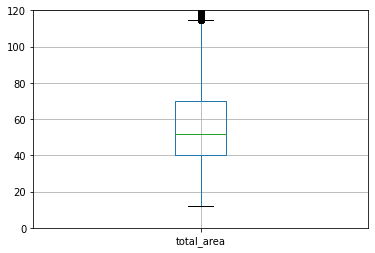

In [165]:
#так как в дальнейшем нам понадобится изучить корреляцию общей площади и цены за кв. м., рассмотрим выбросы в данном столбце

plt.ylim(0, 120)
data.boxplot('total_area')

Все что выше 117 - выбросы, избавимся от них

In [166]:
data_clear = data.query('total_area <= 117')
data_clear

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,посeлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,9.1,0,городской посeлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,8.0,0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.5,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,9.1,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.0,12,False,...,23.3,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [167]:
#рассмотрим аномальные значения по столбцам
data['rooms'].describe()

#вполне возможно, что на количество комнат составляет 19, а вот 0 комнат в помещении - это странно. Если только это не техническое помещение или студия.
#В среднем объекты имеют 2 комнаты.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

In [168]:
#рассмотрим аномальные значения по столбцам
data['ceiling_height'].describe()

#высота потолка 100 метров - слишком много. 
#высота потолков 1 метр - тоже странное значение. 

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [169]:
#рассмотрим количество объектом со слишком высоким потолком - всего 11 объектов

len(data.query('ceiling_height > 10')['ceiling_height'].unique())

11

In [170]:
#убираем аномальные значения - делим высоту потолков, которые выше 10 метров, на 10:

for item in range(len(data['ceiling_height'])):
    if data.loc[item, 'ceiling_height'] > 10:
        data.loc[item, 'ceiling_height'] /= 10 

In [171]:
#проверяем - аномально высоких значений нет

data['ceiling_height'].describe()

count    23699.000000
mean         2.697798
std          0.237643
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         10.000000
Name: ceiling_height, dtype: float64

In [172]:
#рассмотрим аномальные значения по столбцам

data['floors_total'].describe()

#в основном в доме 10 этажей, а бывает и 60 этажей. Минимальное значение 1 - все ок  

count    23699.000000
mean        10.671463
std          6.595802
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

In [173]:
#рассмотрим аномальные значения по столбцам

data['living_area'].describe()

#в основном в доме 21 кв. м. жилой площади, а бывает и 409 кв. м.  

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

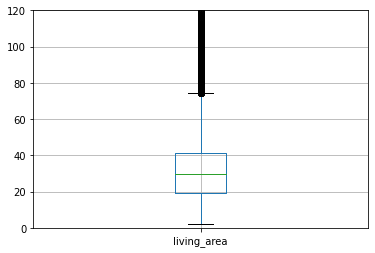

In [174]:
#так как в дальнейшем нам понадобится изучить корреляцию жилой площади и цены за кв. м., рассмотрим выбросы в данном столбце

plt.ylim(0, 120)
data.boxplot('living_area')

все, что выше 75 - выбросы, уберем их

In [175]:
data_clear = data_clear.query('living_area < 75')
data_clear

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.0,2,посeлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.3,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.4,5,False,...,9.1,0,городской посeлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,8.0,0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.0,4,False,...,8.5,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.7,1,False,...,9.1,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,30.0,12,False,...,23.3,2,санкт-петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [176]:
#рассмотрим аномальные значения по столбцам

data['floor'].describe()

#в основном объекты располагаются на высоте 5 этажа, аномальных значений нет

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

In [177]:
#рассмотрим аномальные значения по столбцам

data['kitchen_area'].describe()

#в основном в доме 21 кв. м. площади кухни, а бывает и 112 кв. м.  

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

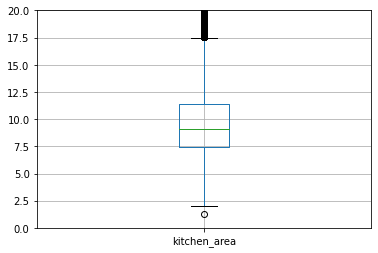

In [178]:
#так как в дальнейшем нам понадобится изучить корреляцию жилой площади и цены за кв. м., рассмотрим выбросы в данном столбце

plt.ylim(0, 20)
data.boxplot('kitchen_area')

все, что выше 17,5 - выбросы, избавимся от них

In [179]:
data_clear = data_clear.query('kitchen_area < 17.5')
data_clear

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,11.00,2,посeлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,8.30,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,9.10,0,городской посeлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,14.40,1,посeлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,8.81,0,посeлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.50,4,False,...,6.00,0,тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.00,8,False,...,8.00,0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23695,14,3100000.0,59.00,2018-01-15,3,2.65,5.0,38.00,4,False,...,8.50,0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11,2,2.65,3.0,29.70,1,False,...,9.10,0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [180]:
#рассмотрим аномальные значения по столбцам

data['airports_nearest'].describe()

#в основном объекты расположены на расстоянии 29 км от аэропорта, но бывает и в 3 раза больше - 85 км

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64

In [181]:
#рассмотрим аномальные значения по столбцам

data['cityCenters_nearest'].describe()

#в основном объекты расположены на расстоянии 14 км от центра города, но бывает и в 5 раз больше - 66 км

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

In [182]:
#рассмотрим аномальные значения по столбцам

data['days_exposition'].describe()

#в основном объявления держатся на сайте жо продажи 169 дней, но бывает и в 10 раз больше - 1580

len(data[data['days_exposition'] > 365])/len(data) #12% объявлений продаются более года

len(data[data['days_exposition'] > 365*2])/len(data) #3% объявлений продаются более года

len(data[data['days_exposition'] > 365*3])/len(data) #1% объявлений продаются более года - скоррее всего люди забывают снять объявления с сайта 

0.007004514958437065

In [183]:
pers = (1 - len(data_clear)/len(data)) * 100
print('Было отброшено ', round(pers, 2), '% выборки')

Было отброшено  9.5 % выборки


### Выводы

Таким образом, мы предобработали данные следующим образом:

Преобразование типов данных:
* для тех столбцов, которые содержат числовые значения, но имели тип данных object, был преобразован тип данных на float
* для булевых данных был определен формат bool
* для столбца с датой был выбран формат данных типа дата. 

Работа с дубликатами:
* дублирующих строк не обнаружено
* неявные дубликаты были устранены в столбце с наименованием населенных пунктов: вместо "посёлок" на "поселок", вместо "посёлок городского типа" на "поселок" и тд. 

Работа с пустыми значениями:
* были заменены пустые значения на медианные в столбцах с числовыми значениями. 
* пропуски в стобцах с булевыми значения были заменены на false или 0 (в связи с тем, что пропуски объявнены значением по умолчанию)
* пропуски названии населенных пунктов заменены на "нет населенного пункта"
* пропуски с количеством этажей были заполнены значением этажа квартиры
* пропуски с количеством дней продажи оставлены в связи с тем, что квартиры еще не проданы
* пропуски в геоданных оставлены в связи с большой долей пропущенных значений, в том числе необходима более подробная информация по населенным пунктам лен области. 

Работа с аномальными значениями:
* аномально большие значения обнаружены в столбце с высотой потолков - высота более 10 метров заменена на значение высоты потолка/10
* были отчищены данные от выбросов по количественным признакам: жилая площадь, площадь кухни, общая площать. Остальные данные (количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год) являются категориальными, поэтому их не вычищала.



## Шаг 3. Добавление новой информации

In [184]:
#добавление столбца цена одного квадратного метра

data_clear['price_for_sq_m'] = data_clear['last_price']/data_clear['total_area']

data_clear.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_m
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,2,посeлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,0,городской посeлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,1,посeлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,0,посeлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777


In [185]:
#добавление столбца день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)

data_clear['day_of_public'] = data_clear['first_day_exposition'].dt.weekday+1

data_clear.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_m,day_of_public
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,посeлок шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,4
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,городской посeлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,1
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,посeлок парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,4
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,посeлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,3


In [186]:
#добавление столбца месяц публикации объявления

data_clear['month_of_public'] = pd.DatetimeIndex(data_clear['first_day_exposition']).month

data_clear.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_m,day_of_public,month_of_public
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2,12
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,4,8
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,1,9
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,4,11
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,3,5


In [187]:
#добавление столбца год публикации объявления

data_clear['year_of_public'] = pd.DatetimeIndex(data_clear['first_day_exposition']).year

data_clear.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_m,day_of_public,month_of_public,year_of_public
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,18603.0,0.0,NaN,0.0,NaN,81.0,82920.792079,2,12,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,13933.0,1.0,90.0,2.0,574.0,558.0,92785.714286,4,8,2015
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,NaN,55.0,95065.789474,1,9,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,19143.0,0.0,NaN,0.0,NaN,155.0,99195.710456,4,11,2017
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,NaN,189.0,87454.764777,3,5,2018


In [188]:
#добавление столбца тип этажа квартиры (значения — «первый», «последний», «другой»)

def type_of_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data_clear['type_of_floor'] = data_clear.apply(type_of_floor, axis=1)

data_clear.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_m,day_of_public,month_of_public,year_of_public,type_of_floor
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,0.0,NaN,0.0,NaN,81.0,82920.792079,2,12,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.714286,4,8,2015,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,NaN,55.0,95065.789474,1,9,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,0.0,NaN,0.0,NaN,155.0,99195.710456,4,11,2017,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,NaN,189.0,87454.764777,3,5,2018,другой


In [189]:
#добавление столбца расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

data_clear['city_centre_distance_in_km'] = data_clear['cityCenters_nearest'] / 1000
data_clear.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_m,day_of_public,month_of_public,year_of_public,type_of_floor,city_centre_distance_in_km
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.792079,2,12,2018,первый,18.603
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,...,90.0,2.0,574.0,558.0,92785.714286,4,8,2015,другой,13.933
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.789474,1,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.710456,4,11,2017,другой,19.143
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.764777,3,5,2018,другой,NaN


## Шаг 4. Исследовательский анализ данных

#### Общая площадь

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

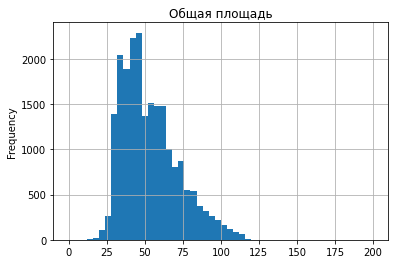

In [190]:
#рассмотрим общую площадь

data_clear['total_area'].plot(kind = 'hist', title = 'Общая площадь', grid = True, bins = 50, range = (0, 200))

* Больше всего продается квартир площадью 42-45 м.кв

#### Жилая площадь

<AxesSubplot:title={'center':'Жилая площадь'}, ylabel='Frequency'>

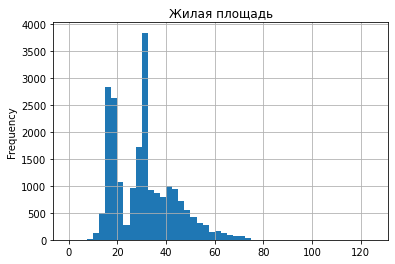

In [191]:
data_clear['living_area'].plot(kind = 'hist', title = 'Жилая площадь', grid = True, bins = 50, range = (0, 125))

* На диаграмме наблюдается 2 пика: 18 и 30 м.кв

#### Площадь кухни

<AxesSubplot:title={'center':'Площадь кухни'}, ylabel='Frequency'>

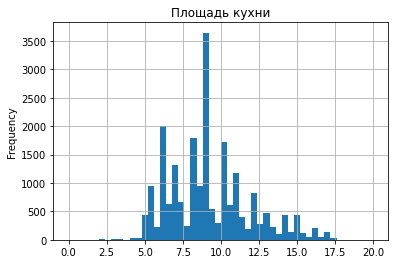

In [192]:
data_clear['kitchen_area'].plot(kind = 'hist', title = 'Площадь кухни', grid = True, bins = 50, range = (0, 20))

* Наибольшее количество объектов имеет площадь кухни 9 м.кв

#### Цена объекта

<AxesSubplot:title={'center':'Цена объекта'}, ylabel='Frequency'>

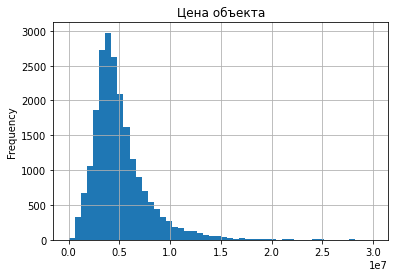

In [193]:
data_clear['last_price'].plot(kind = 'hist', title = 'Цена объекта', grid = True, bins = 50, range = (0, 30000000))

* Наибольшее количество объектов стоит 3-4 млн руб.

#### Количество комнат

<AxesSubplot:title={'center':'Количество комнат'}, ylabel='Frequency'>

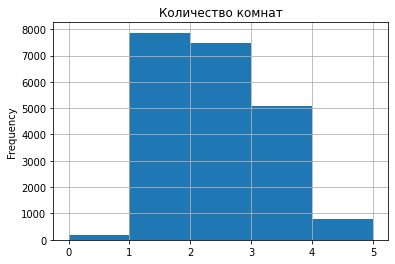

In [194]:
data_clear['rooms'].plot(kind = 'hist', title = 'Количество комнат', grid = True, bins = 5, range = (0, 5))

* В основном количество комнат в объектах - 1 или 2 комнаты

#### Высота потолков

<AxesSubplot:title={'center':'Высота потолков'}, ylabel='Frequency'>

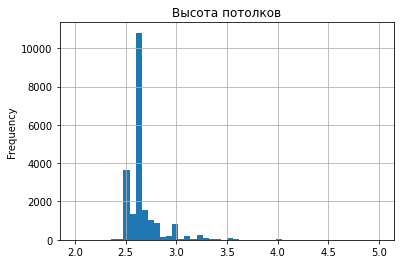

In [195]:
data_clear['ceiling_height'].plot(kind = 'hist', title = 'Высота потолков', grid = True, bins = 50, range = (2, 5))

* В основном высота потолков составляет 2,6 м.

#### Этаж квартиры

<AxesSubplot:title={'center':'Этаж квартиры'}, ylabel='Frequency'>

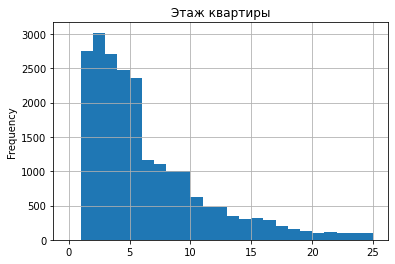

In [196]:
data_clear['floor'].plot(kind = 'hist', title = 'Этаж квартиры', grid = True, bins = 25, range = (0, 25))

* В основном квартиры располагаются на 3 этаже

#### Тип этажа квартиры

<AxesSubplot:title={'center':'Тип этажа квартиры'}, xlabel='type_of_floor'>

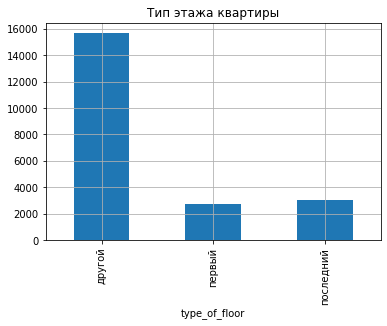

In [197]:
data_clear.groupby('type_of_floor')['type_of_floor'].count().plot(kind = 'bar', title = 'Тип этажа квартиры', grid = True)

* Меньше всего объектов располагается на 1 этаже. Затем с небольшим опережением идет количество квартир на последнем этаже. 
Наибольшую же часть занимают объекты, которые не попадают в эти категории. 

#### Общее количество этажей в доме

<AxesSubplot:title={'center':'Общее количество этажей в доме'}, ylabel='Frequency'>

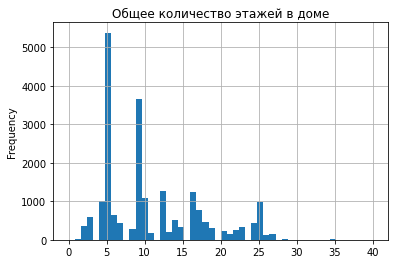

In [198]:
data_clear['floors_total'].plot(kind = 'hist', title = 'Общее количество этажей в доме', grid = True, bins = 50, range = (0, 40))

* В основном в домах встречается 5 этажей

#### Расстояние до центра города в метрах



<AxesSubplot:title={'center':'Расстояние до центра города в метрах'}, ylabel='Frequency'>

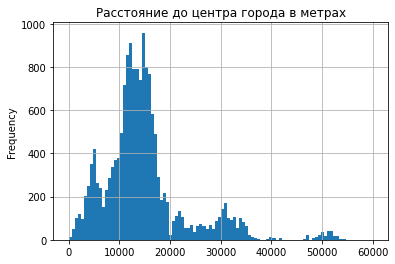

In [199]:
data_clear['cityCenters_nearest'].plot(kind = 'hist', title = 'Расстояние до центра города в метрах', grid = True, bins = 100, range = (0, 60000))

* В основном до центра города примерно 15 000 метров (не более 20 000 метров)

#### Расстояние до ближайшего аэропорта

<AxesSubplot:title={'center':'Расстояние до ближайшего аэропорта'}, ylabel='Frequency'>

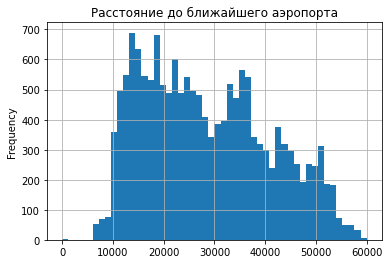

In [200]:
data_clear['airports_nearest'].plot(kind = 'hist', title = 'Расстояние до ближайшего аэропорта', grid = True, bins = 50, range = (0, 60000))

Наблюдается несколько пиков: от 15 000 метров до 25 000 метров.  


#### Расстояние до ближайшего парка

<AxesSubplot:title={'center':'Расстояние до ближайшего парка'}, ylabel='Frequency'>

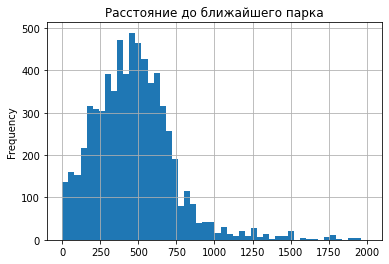

In [201]:
data_clear['parks_nearest'].plot(kind = 'hist', title = 'Расстояние до ближайшего парка', grid = True, bins = 50, range = (0, 2000))

* В основном до ближайшего парка не более 500 метров

#### День и месяц публикации объявления

<AxesSubplot:title={'center':'День публикации объявления'}, ylabel='Frequency'>

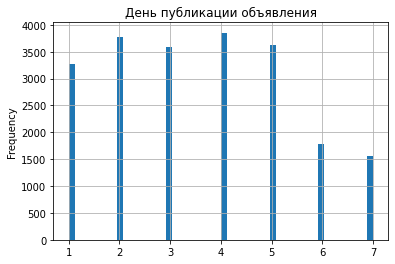

In [202]:
data_clear['day_of_public'].plot(kind = 'hist', title = 'День публикации объявления', grid = True, bins = 50, range = (1, 7))

* В основном люди публикуют объявления в четверг и во вторник. В будний день активность намного больше, чем в выходной день.

<AxesSubplot:title={'center':'Месяц публикации объявления'}, ylabel='Frequency'>

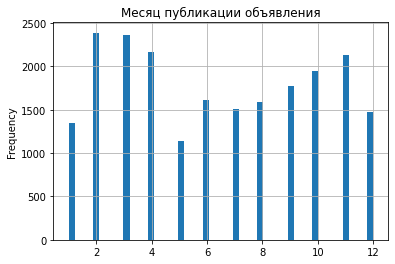

In [203]:
data_clear['month_of_public'].plot(kind = 'hist', title = 'Месяц публикации объявления', grid = True, bins = 50, range = (1, 12))

* В основном люди публикуют объявления в первом квартале года. Наблюдается пик активности в феврале, затем в марте и апреле. 

#### Количество дней до продажи квартиры

count    18774.000000
mean       172.419410
std        210.002748
min          1.000000
25%         44.000000
50%         91.000000
75%        218.750000
max       1580.000000
Name: days_exposition, dtype: float64

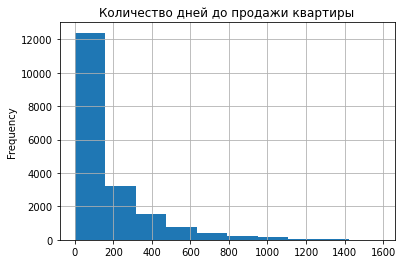

In [204]:
data_clear['days_exposition'].plot(kind = 'hist', grid = True, title = 'Количество дней до продажи квартиры')

data_clear['days_exposition'].describe()

* В основном квартиры продавались не более чем за 200 дней
* При этом среднее значение дней продажи составляет 162 дня. 
* Медианное значение среднего количнества дней продажи квартиры составляет 95 дней.
* Самая короткая продажа квартиры занимала 1 день, а самая длинная - 1580 дней. 


<AxesSubplot:>

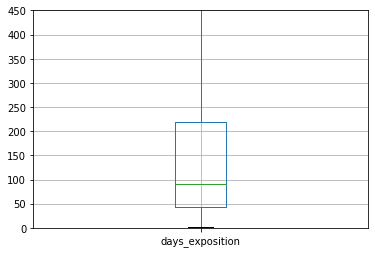

In [205]:
plt.ylim(0, 450)
data_clear.boxplot('days_exposition')

На графике видно, что в среднем квартиры продаются примерно за 90 дней, 

Все значения выше 420 дней попадают под выбросы (как 1,5 интервала от Q3), в связи с чем можно избавиться от этих выбросов. Можно считать, что продажи выше этого срока - необычайно долгие

In [206]:
data_clear = data_clear.query('days_exposition < 420')
data_clear

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_for_sq_m,day_of_public,month_of_public,year_of_public,type_of_floor,city_centre_distance_in_km
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,...,NaN,0.0,NaN,81.0,82920.792079,2,12,2018,первый,18.603
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,...,NaN,NaN,NaN,55.0,95065.789474,1,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,...,NaN,0.0,NaN,155.0,99195.710456,4,11,2017,другой,19.143
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,...,NaN,NaN,NaN,189.0,87454.764777,3,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,...,NaN,0.0,NaN,289.0,88524.590164,7,2,2017,другой,15.008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.30,4,False,...,353.0,2.0,652.0,29.0,100566.572238,3,2,2018,другой,16.081
23690,3,5500000.0,52.00,2018-07-19,2,2.65,5.0,31.00,2,False,...,300.0,0.0,NaN,15.0,105769.230769,4,7,2018,другой,6.263
23692,2,1350000.0,30.00,2017-07-07,1,2.65,5.0,17.50,4,False,...,NaN,NaN,NaN,413.0,45000.000000,5,7,2017,другой,NaN
23693,9,4600000.0,62.40,2016-08-05,3,2.60,9.0,40.00,8,False,...,352.0,1.0,675.0,239.0,73717.948718,5,8,2016,другой,34.104


<AxesSubplot:>

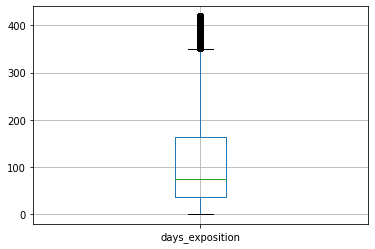

In [231]:
data_clear.boxplot('days_exposition')

Самые быстрые продажи - 1 день. Можно сказать также, что 25% всей выборки успевают продать квартиры за 38 дней. 
А вот все что находится после 350 - уже выбросы. 

In [229]:
data_clear['days_exposition'].describe()

count    16736.000000
mean       112.562799
std        101.392302
min          1.000000
25%         38.000000
50%         76.000000
75%        163.000000
max        419.000000
Name: days_exposition, dtype: float64

<AxesSubplot:ylabel='Frequency'>

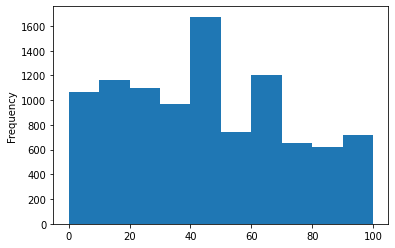

In [238]:
data_clear['days_exposition'].plot(kind = 'hist', range = (0, 100))

Чаще всего продажи происходят на 40-50 день после выкладывания объявления

#### Нахождение зависимости на общую (полную) стоимость объекта

Отберем столбцы, которые будут участвовать в исследовании:
* полная стоимость;
* общая площадь;
* жилая площадь;
* площадь кухни;
* количество комнат;
* этаж, на котором расположена квартира (первый, последний, другой);
* дата размещения (день недели, месяц, год).

In [207]:
col = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'type_of_floor', 'day_of_public', 'month_of_public', 'year_of_public' ]

data_corr = data_clear[col].reset_index(drop = True)
data_corr

,last_price,total_area,living_area,kitchen_area,rooms,type_of_floor,day_of_public,month_of_public,year_of_public
0,3350000.0,40.40,18.60,11.00,1,первый,2,12,2018
1,2890000.0,30.40,14.40,9.10,1,другой,1,9,2018
2,3700000.0,37.30,10.60,14.40,1,другой,4,11,2017
3,2900000.0,33.16,15.43,8.81,1,другой,3,5,2018
4,5400000.0,61.00,43.60,6.50,3,другой,7,2,2017
...,...,...,...,...,...,...,...,...,...
16731,3550000.0,35.30,16.30,9.10,1,другой,3,2,2018
16732,5500000.0,52.00,31.00,6.00,2,другой,4,7,2018
16733,1350000.0,30.00,17.50,6.00,1,другой,5,7,2017
16734,4600000.0,62.40,40.00,8.00,3,другой,5,8,2016


Найдем зависимость между количественными категориями: полная стоимость; общая площадь; жилая площадь; площадь кухни;

In [208]:
data_corr[['last_price', 'total_area', 'living_area', 'kitchen_area']].corr()

,last_price,total_area,living_area,kitchen_area
last_price,1.000000,0.685660,0.537314,0.433644
total_area,0.685660,1.000000,0.870479,0.413209
living_area,0.537314,0.870479,1.000000,0.171738
kitchen_area,0.433644,0.413209,0.171738,1.000000


* Корреляция параметров положительная, что позволяет определить прямое влияение факторов друг на друга: с увеличением одного фактора, растет и другой фактор.
* Как видно из таблицы выше: общая площадь сильно влияет на общую стоимость квартиры: коэффициент корреляции больше 0,6. Можно сказать, что чем больше площадь квартиры, чем больше ее цена. 
* Также можно отметить что жилая площадь и площадь кухни уже слабее влияет на общую стомость недвижимости - коэффициент корреляции меньше 0,6.

* Также можно заметить, что площадь жилой части квартиры сильно влияет на общую площадь, что логично: чем больше площадь жилая, тем больше общая площадь. А вот размер кухни практически не влияет на общую площадь (коэффициент корреляции 0.2) и средне влияет на жилую площадь (коэффициент корреляции 0.4)


Найдем зависимость между категориальными признаками: полная стоимость; количество комнат; этаж, на котором расположена квартира (первый, последний, другой);
дата размещения (день недели, месяц, год)

#### Количество комнат и цена

<AxesSubplot:title={'center':'Количество комнат и средняя цена'}, xlabel='rooms', ylabel='last_price'>

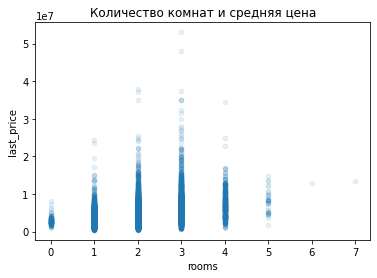

In [209]:
data_corr.plot(x='rooms', y='last_price', kind='scatter', alpha=0.1, title = "Количество комнат и средняя цена") 

Данный график показывает, что при увеличении количества комнат в квартире, цена на квартиру растет, при этом четкий рост наблюдается при увеличении до 3 комнат в квартире. Далее от 4 комнат рост останаливается и даже снижается. 

<AxesSubplot:title={'center':'Количество комнат и средняя цена'}, xlabel='rooms'>

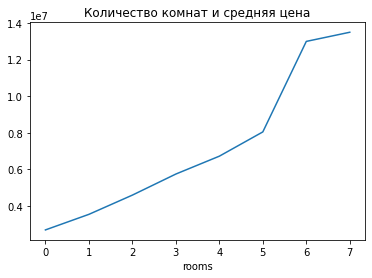

In [210]:
data_corr.groupby('rooms')['last_price'].median().plot(title = "Количество комнат и средняя цена") 

При этом на линейном графике видно, что рост почти линейный, и чем больше комнат - тем больше стоимость квартиры. 
Однако этот вывод применим лишь к увеличению количества комнат от 0 до 3.

#### Этаж и цена

<AxesSubplot:title={'center':'Этаж и средняя цена'}, xlabel='type_of_floor', ylabel='last_price'>

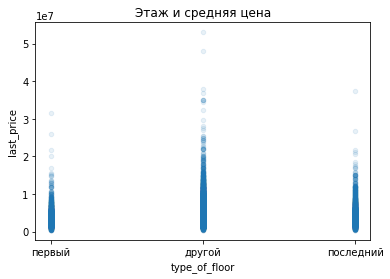

In [211]:
data_corr.plot(x='type_of_floor', y='last_price', kind='scatter', alpha=0.1, title = "Этаж и средняя цена") 

Как  можно заметить из графика выше, меньше всего стоят квартиры на первом этаже. Затем идут квартиры на последнем этаже. Самые высокие цены на квартиры на этаже между первым и последним.  

<AxesSubplot:title={'center':'Этаж и средняя цена'}, xlabel='type_of_floor'>

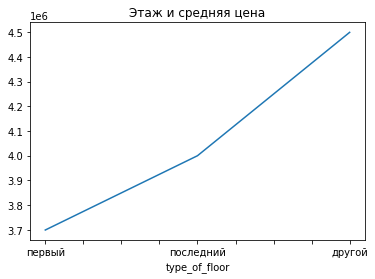

In [212]:
data_corr.groupby('type_of_floor')['last_price'].median().sort_values().plot(title = "Этаж и средняя цена") 

График выше подтверждает гипотезу, выдвинутую ранее - самые высокие цены на квартиры на этаже между первым и последним

#### Дата размещения и цена

<AxesSubplot:title={'center':'День и средняя цена'}, xlabel='day_of_public', ylabel='last_price'>

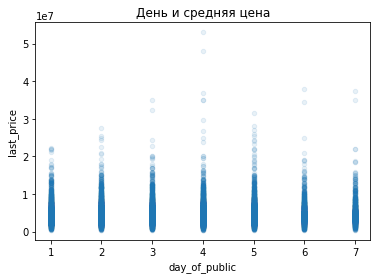

In [213]:
data_corr.plot(x='day_of_public', y='last_price', kind='scatter', alpha=0.1, title = "День и средняя цена") 

По графику выше цена продажи квартиры не зависит от дня недели

<AxesSubplot:title={'center':'День и средняя цена'}, xlabel='day_of_public'>

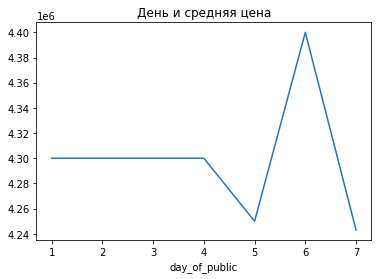

In [214]:
data_corr.groupby('day_of_public')['last_price'].median().plot(title = "День и средняя цена") 

Как видно на графике выше, средняя цена не зависит от дня недели публикации: наблюдается в целом снижение стоимости квартир со среды до пятницы и на выходных. Самое лучшее время выкладывания объявлений - вторник и понедельник.  


<AxesSubplot:title={'center':'Месяц и средняя цена'}, xlabel='month_of_public', ylabel='last_price'>

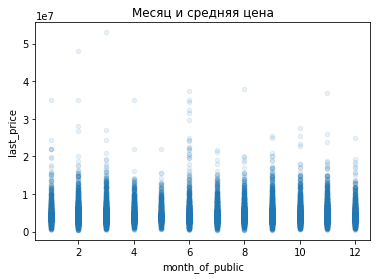

In [215]:
data_corr.plot(x='month_of_public', y='last_price', kind='scatter', alpha=0.1, title = "Месяц и средняя цена") 

Зависимость от месяца не прослеживается.

<AxesSubplot:title={'center':'Месяц и средняя цена'}, xlabel='month_of_public'>

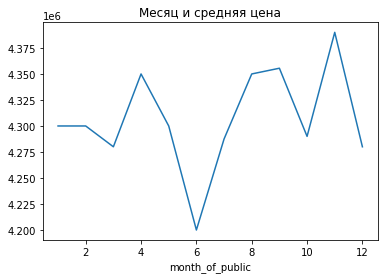

In [216]:
data_corr.groupby('month_of_public')['last_price'].median().plot(title = "Месяц и средняя цена") 

Тоже можно сказать и про месяц публикации: прямой зависимости месяца и цены объекта нет. Можно отметить следующие паттерны: зимой и весной цена на квартиры выше чем летом и осенью. Лучше всего заниматься прожажей кватиры в первой половине года

<AxesSubplot:title={'center':'Год и средняя цена'}, xlabel='year_of_public', ylabel='last_price'>

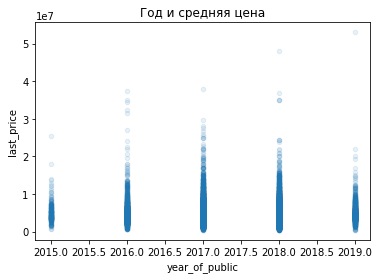

In [217]:
data_corr.plot(x='year_of_public', y='last_price', kind='scatter', alpha=0.1, title = "Год и средняя цена") 

Как можно заметить на графике выше, цены на квартиры растут от года к году: лучше всего продавались квартиры в 2018 году. Однако роста с 2014 года очевиден. 

<AxesSubplot:title={'center':'Год и средняя цена'}, xlabel='year_of_public'>

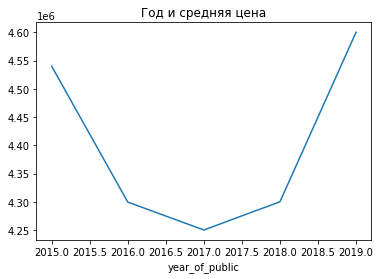

In [218]:
data_corr.groupby('year_of_public')['last_price'].median().plot(title = "Год и средняя цена") 

При этом совершенно противоположные результаты показываются на графике выше. На графике явно видно, что цена квартир падает. Пик продаж наблюдается в первый год датасета - 2014г. Можно сказать, что продажей квартиры лучще всего заниматься раньше, чем позже. 

В целом можно отметить, что с увеличеним года растет и цена

#### Средняя цена одного квадратного метра в 10 населенных пунктах 

In [219]:
top_ten_local_name = data_clear.pivot_table(index = 'locality_name', values = 'price_for_sq_m', aggfunc=('count','median')).sort_values('count', ascending = False).head(10)

top_ten_local_name.sort_values(by = 'median', ascending = False)

,count,median
locality_name,,
санкт-петербург,10819,101851.851852
пушкин,249,97297.297297
кудрово,369,95840.867993
посeлок парголово,263,91328.413284
посeлок мурино,460,86311.913573
посeлок шушары,369,76315.789474
колпино,281,73529.411765
гатчина,231,67173.913043
всеволожск,285,65686.274510


В таблице выше представлены 10 наиболее крупных населенных пунктов по количеству объявлений. Так, больше всего объявлений в Санкт_Петербурге, а меньше всего (из 10 объектов) - в Выборге. 
Зависимости стоимости квадратного метра от количества объявлений не обнаружено: так, наибольшая цена квадратного метра находится в Санкт-Петербурге, так как это крупнейший город лен области. Затем по цене квартир идут город Пушкин и Кудрово. Самая низкая стомость квартир в городе Гатчина, Всеволожск, Выборг. 

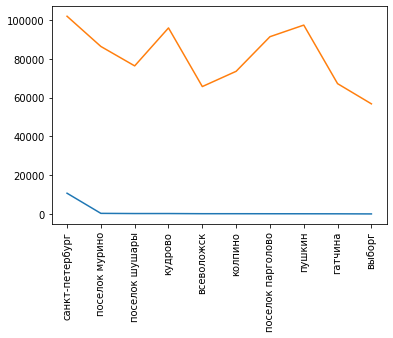

In [220]:
plt.plot(top_ten_local_name.index, top_ten_local_name['count'])
plt.plot(top_ten_local_name.index, top_ten_local_name['median'])
plt.xticks(rotation=90)
plt.show()

#### Цена каждого км в Санкт-Петербурге

In [221]:
spb_new = data_clear.query('locality_name == "санкт-петербург"')
spb_new.isna().sum()

total_images                     0
last_price                       0
total_area                       0
first_day_exposition             0
rooms                            0
ceiling_height                   0
floors_total                     0
living_area                      0
floor                            0
is_apartment                     0
studio                           0
open_plan                        0
kitchen_area                     0
balcony                          0
locality_name                    0
airports_nearest                32
cityCenters_nearest             17
parks_around3000                17
parks_nearest                 6157
ponds_around3000                17
ponds_nearest                 5610
days_exposition                  0
price_for_sq_m                   0
day_of_public                    0
month_of_public                  0
year_of_public                   0
type_of_floor                    0
city_centre_distance_in_km      17
dtype: int64

В датасете наблюдается 17 пустых значений - удалим их

In [222]:
spb_new = spb_new.reset_index().dropna(subset = ['cityCenters_nearest'])

spb_new['city_centre_distance_in_km'] = spb_new['city_centre_distance_in_km'].astype('int64')

<AxesSubplot:title={'center':'Средняя цена каждого км'}, xlabel='city_centre_distance_in_km'>

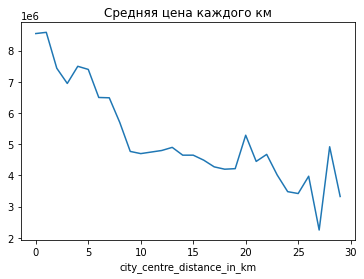

In [223]:
spb_new.groupby('city_centre_distance_in_km')['last_price'].median().plot(title = 'Средняя цена каждого км')

Так, при расстоянии от 0 до 5 км средняя цена на квартиру падает от 9 000 000 руб до 7 600 000 руб., то есть на 16%. 
Самая низкая цена наблюдается при удалении от центра на 27 км - 2 250 000 руб, что ниже самого высокого значения цены на 75%

<AxesSubplot:title={'center':'Цены каждого км'}, xlabel='city_centre_distance_in_km', ylabel='last_price'>

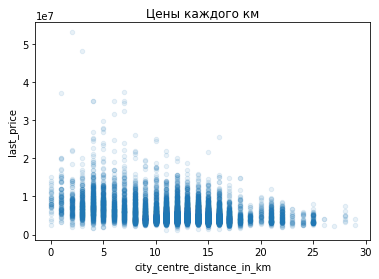

In [224]:
spb_new.plot(x='city_centre_distance_in_km', y='last_price', kind='scatter', alpha=0.1, title = 'Цены каждого км') 

Однозначно видно, что при удалении квартиры от центра города ее цена смещается вниз

In [225]:
spb_new['last_price'].corr(spb_new['city_centre_distance_in_km'])

-0.3512804121103459

Коэффициет корреляции Пирсона указывает на наличие слабой орицательной связи: увеличение расстояние от центра города слабо влияет на уменьшение цены квартиры 

## Общие выводы

#### Основная задача исследования - определить факторы, влияющие на строимость квартиры

В качетсве проекта было предложено рассмотреть данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

* Первым этапом работы было чтение файла и рассмотрение основной информации о нем. 

* Вторым этапом работы была предобработка данных:
    Преобразованы типы данных:
        * для тех столбцов, которые содержат числовые значения, но имели тип данных object, был преобразован тип данных на float
        * для булевых данных был определен формат bool
        * для столбца с датой был выбран формат данных типа дата.
    
    Проведена работа с дубликатами:
        * дублирующих строк не обнаружено
        * неявные дубликаты были устранены в столбце с наименованием населенных пунктов: вместо "посёлок" на "поселок", вместо "посёлок городского типа" на "поселок" и тд.

    Проведена работа с пустыми значениями:
        * были заменены пустые значения на медианные в столбцах с числовыми значениями.
        * пропуски в стобцах с булевыми значения были заменены на false или 0 (в связи с тем, что пропуски объявнены значением по умолчанию)
        * пропуски названии населенных пунктов заменены на "нет населенного пункта"
        * пропуски в геоданных оставлены в связи с большой долей пропущенных значений, в том числе необходима более подробная информация по населенным пунктам лен области.

    Проведена работа с аномальными значениями:
        * аномально большие значения обнаружены в столбце с высотой потолков - высота более 10 метров заменена на значение высоты потолка/10
        * были отчищены данные от выбросов по количественным признакам: жилая площадь, площадь кухни, общая площать. Остальные данные (количества комнат; этажа, на котором расположена квартира (первый, последний, другой); даты размещения (день недели, месяц, год) являются категориальными, поэтому их не вычищала.

* Третьим этапом работы было выполнено добавление дополнительных столбцов, необходимых для исследования:
    * цена одного квадратного метра;
    * день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
    * месяц публикации объявления;
    * год публикации объявления;
    * тип этажа квартиры (значения — «первый», «последний», «другой»);
    * расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
    
    
* Четвертым этапом работы была проведена исследовательская работа по определению факторов, влияющих на цену квартиры. Были выбраны следующие факторы:
    * полная стоимость;
    * общая площадь;
    * жилая площадь;
    * площадь кухни;
    * количество комнат;
    * этаж, на котором расположена квартира (первый, последний, другой);
    * дата размещения (день недели, месяц, год).

Так, было обнаружено с помощью рассчета корреляции следующие выводы:

**Жилая площадь, площадь кухни, общая площадь**
   * Корреляция параметров "общая площаль квартиры", "жилая площадь", "площадь кухни" положительная, что позволяет определить прямое влияение факторов друг на друга: с увеличением одного фактора, растет и другой фактор.
   * общая площадь сильно влияет на общую стоимость квартиры: коэффициент корреляции больше 0,6. Можно сказать, что чем больше площадь квартиры, чем больше ее цена.
   * Жилая площадь и площадь кухни уже слабее влияет на общую стомость недвижимости - коэффициент корреляции меньше 0,6.
   * Площадь жилой части квартиры сильно влияет на общую площадь, что логично: чем больше площадь жилая, тем больше общая площадь. А вот размер кухни практически не влияет на общую площадь (коэффициент корреляции 0.2) и средне влияет на жилую площадь (коэффициент корреляции 0.4)
   
**Количество комнат** 
   * увеличение количества комнат в квартире, цена на квартиру растет, при этом четкий рост наблюдается при увеличении до 3 комнат в квартире. Далее от 4 комнат рост останаливается и даже снижается. При этом на линейном графике видно, что рост почти линейный, и чем больше комнат - тем больше медианная стоимость квартиры. Однако этот вывод применим лишь к увеличению количества комнат от 0 до 3.
   
**Этаж**
   * меньше всего стоят квартиры на первом этаже. Затем идут квартиры на последнем этаже. Самые высокие цены на квартиры на этаже между первым и последним.  
   
**Дата размещения** 
   * средняя цена не зависит от дня недели публикации: наблюдается в целом снижение стоимости квартир со среды до пятницы и на выходных. Самое лучшее время выкладывания объявлений - вторник и понедельник. Зависимость от дня недели не прослеживается.
   * прямой зависимости месяца и цены объекта нет. Можно отметить следующие паттерны: зимой и весной цена на квартиры выше чем летом и осенью. Лучше всего заниматься прожажей кватиры в первой половине года. Зависимость от дня недели не прослеживается.
   * цены на квартиры растут от года к году: лучше всего продавались квартиры в 2018 году. Однако рост с 2014 года очевиден. При этом совершенно противоположные результаты показываются на графике средней цены по годам: цена квартир падает. Пик продаж наблюдается в первый год датасета - 2014г. Можно сказать, что продажей квартиры лучще всего заниматься раньше, чем позже. В целом можно отметить, что с увеличеним года растет и цена. 
   
**Населенный пункт**
   * Больше всего объявлений в Санкт_Петербурге, а меньше всего (из 10 объектов) - в Выборге. Зависимости стоимости квадратного метра от количества объявлений не обнаружено: так, наибольшая цена квадратного метра находится в Санкт-Петербурге (1 место по кол-ву объявлений), так как это крупнейший город лен области. Затем по цене квартир идут город Пушкин (7 место) и Кудрово (4 место). Самая низкая стомость квартир в городе Гатчина (9 место), Всеволожск (5 место), Выборг (10 место). 

**Цена каждого км в Санкт-Петербурге**
   * Так, при расстоянии от 0 до 5 км средняя цена на квартиру падает от 9 000 000 руб до 7 600 000 руб., то есть на 16%. Самая низкая цена наблюдается при удалении от центра на 27 км - 2 250 000 руб, что ниже самого высокого значения цены на 75%. Однозначно видно, что при удалении квартиры от центра города ее цена смещается вниз. Коэффициет корреляции Пирсона указывает на наличие слабой орицательной связи: увеличение расстояние от центра города слабо влияет на уменьшение цены квартиры
   
   
В завершении отметим, что в среднем квартиры продаются примерно за 90 дней. Все значения выше 420 дней попадают под выбросы (как 1,5 интервала от Q3). Можно считать, что продажи выше этого срока - необычайно долгие